# Iris Flower Classification Model

In [1]:
# Importing essential Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
iris = load_iris()

# Convert the data and feature names into a DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Optionally add the target (species labels)
iris_df['target'] = iris.target

# Display the first few rows
print(iris_df.head())


NameError: name 'load_iris' is not defined

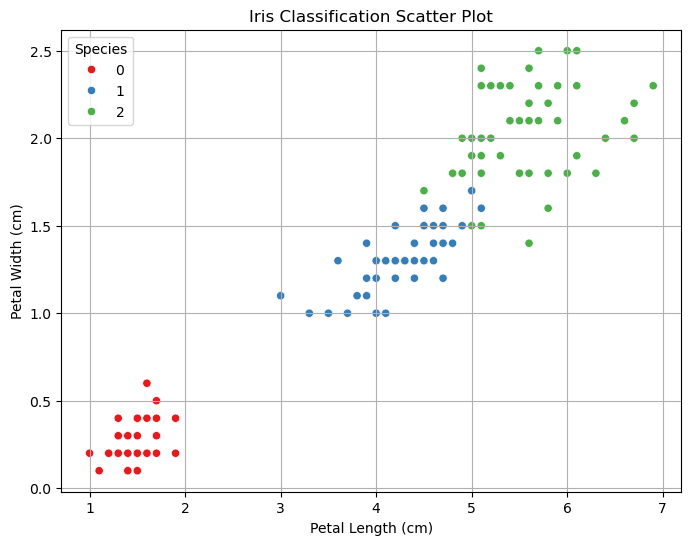

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of petal length vs petal width
plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris_df, 
                x='petal length (cm)', 
                y='petal width (cm)', 
                hue='target', 
                palette='Set1')

plt.title("Iris Classification Scatter Plot")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title='Species')
plt.grid(True)
plt.show()


In [ ]:
#Splitting the dataset into the training and test set

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
print(len(X_test))

38


In [ ]:
# Feature Scaling
# Applying Standardization 

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)

[[ 1.54399532e-02 -1.19254753e-01  2.25126850e-01  3.55797625e-01]
 [-9.98450310e-02 -1.04039491e+00  1.13559562e-01 -2.98410911e-02]
 [ 1.05300481e+00 -1.19254753e-01  9.50314227e-01  1.12707506e+00]
 [-1.36797986e+00  3.41315328e-01 -1.39259884e+00 -1.31530348e+00]
 [ 1.16828980e+00  1.11030287e-01  7.27179649e-01  1.38416753e+00]
 [-1.02212490e+00  1.03217045e+00 -1.22524790e+00 -8.01118523e-01]
 [-5.60984968e-01  1.49274053e+00 -1.28103155e+00 -1.31530348e+00]
 [-1.02212490e+00 -2.42210516e+00 -1.65358660e-01 -2.86933568e-01]
 [ 7.07149859e-01 -1.19254753e-01  9.50314227e-01  7.41436341e-01]
 [ 9.37719827e-01  5.71600368e-01  1.06188152e+00  1.64126001e+00]
 [ 1.30724937e-01 -1.96153508e+00  6.71396005e-01  3.55797625e-01]
 [ 9.37719827e-01 -1.27067995e+00  1.11766516e+00  7.41436341e-01]
 [-3.30414999e-01 -1.27067995e+00  5.77759173e-02 -1.58387330e-01]
 [ 2.09056967e+00 -1.19254753e-01  1.28501609e+00  1.38416753e+00]
 [ 4.76579890e-01  5.71600368e-01  5.04045072e-01  4.84343863e

In [ ]:
# Fitting LogisticRegression 

classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
print(Y_test)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]


In [ ]:
# predicting the Test Set results
Y_pred = classifier.predict(X_test)

#X_pred = classifier.predict(X_train)

print(Y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [ ]:
# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38


Confusion Matrix:
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


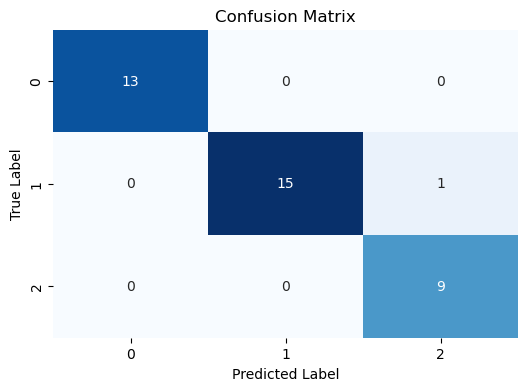

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
